# A Monte Carlo simulation to calculate the expected number of fair coin tosses until getting two consecutive heads

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
from statsmodels.stats.api import DescrStatsW

The simulation mean:		6.001
The 95% confidence interval:	5.972-6.030


<AxesSubplot:>

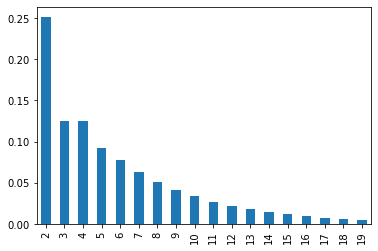

In [2]:
nn = bernoulli.rvs(size=(100000,1000),p=0.5)
temp = nn[:,1:1000] + nn[:,0:999] == 2
result = np.apply_along_axis(lambda x: np.where(x)[0][0], 1, temp) + 2
print("The simulation mean:\t\t%.3f" % result.mean())
ci = DescrStatsW(result).tconfint_mean()
print("The 95%% confidence interval:\t%.3f-%.3f" % (ci[0], ci[1]))
pd.Series(result[result<20]).value_counts().sort_index().to_frame('x').assign(x = lambda y: y / 100000).plot.bar(legend=None)